In [1]:
#Data set link 
#Dataset Link: http://bit.ly/w-data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import accuracy_score
import numpy as np
import joblib

In [3]:
#importing data into jupyter notebook
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [4]:
print(data)
print("This is our Sample Data")

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
This is our Sample Data


In [5]:
#Now we will clean the data 

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.describe()
#Gives description about the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#We will now plot a Histogram for ease of understanding 

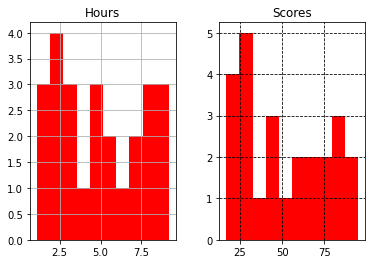

In [10]:
set=data[['Hours','Scores']]
set.hist(color='red')
plt.grid( linestyle = '--',color='black')
plt.show()

In [11]:
#we will plot scatter plot for better visualization

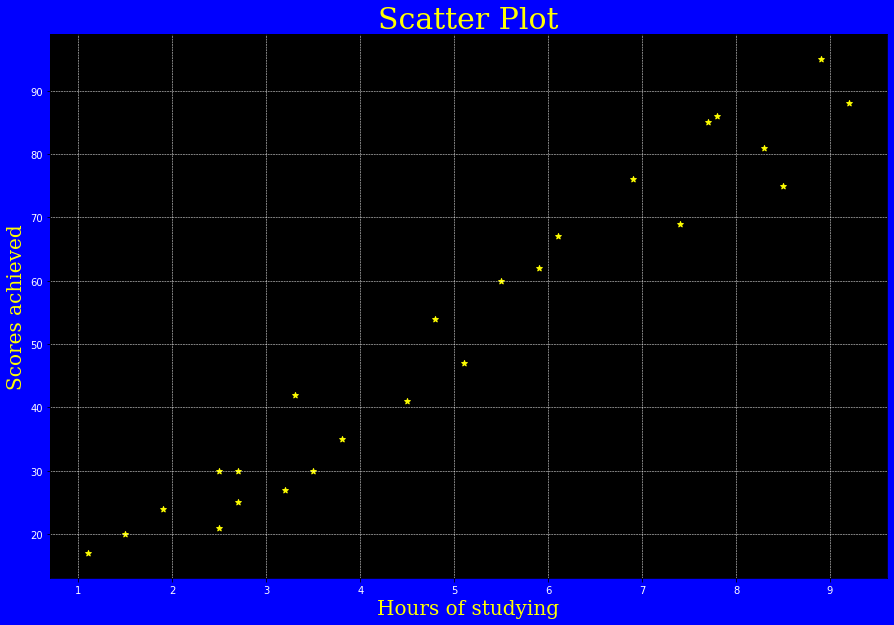

In [12]:
plt.figure(figsize=(15,10),facecolor='blue')
ax=plt.axes()
ax.set_facecolor('black')
font1 = {'family':'serif','color':'yellow','size':20}
font2 = {'family':'serif','color':'yellow','size':30}
plt.scatter(data.Hours, data.Scores,  color='yellow',marker='*')
plt.title('Scatter Plot',fontdict=font2)
plt.xlabel("Hours of studying",fontdict=font1)
plt.ylabel("Scores achieved",fontdict=font1)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

plt.show()

In [13]:
#preparing the data 
x = data.iloc[:,:-1].values
y= data.iloc[:,1].values

In [14]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [16]:
#training and testing the data(80% for training % 20% for testing) 
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.20,random_state = 0)


In [17]:
#values alloted in training and testing 

In [18]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [19]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [20]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [21]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [22]:
#predicting the percantage of the marks
regression = LR()
regression.fit(x_train,y_train)

LinearRegression()

In [23]:
print('MODEL TRAINED')

MODEL TRAINED


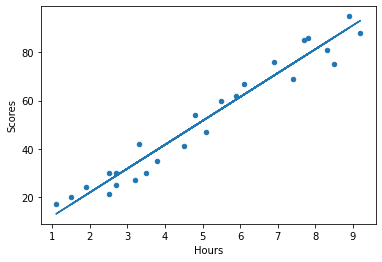

In [24]:
#  'y=mx+c'
line = regression.coef_*x + regression.intercept_
data.plot.scatter(x="Hours",y="Scores")
plt.plot(x,line)
plt.show()

In [25]:
#lets start predicting now

In [26]:
#here it is given prediction for the x_test data set
y_predict=regression.predict(x_test)
prediction= pd.DataFrame({'Hours':[i[0] for i in x_test],'y_predict':[k for k in y_predict]})
prediction

,Hours,y_predict
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [27]:
#comparing predicted values with the actual values
compare=pd.DataFrame({'Predicted Scores':[i for i in y_predict],'Actual Scores':[k for k in y_test]})
compare

,Predicted Scores,Actual Scores
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


In [28]:
#Plot graph 'Predicted' vs 'Actual'

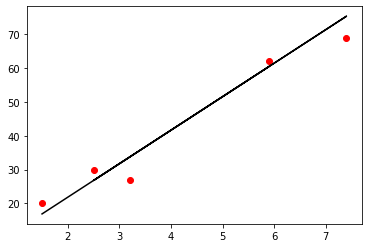

In [29]:
plt.plot(x_test,y_predict,color='black')
plt.scatter(x_test,y_test,color='red')

In [30]:
#now predict your scores by taking any input

In [ ]:
# Test Case Solving using the build model
hours_studied=np.array([[float(input())]])
predicted_marks_achieved=regression.predict(hours_studied)
print('No of hours =', hours_studied[0][0])
print('Predicted Score =',predicted_marks_achieved[0])

In [ ]:
#for MAE
print("Mean Absolute Error = ", metrics.mean_absolute_error(y_test,y_predict))

In [ ]:
#if we try to use decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x,y)
predict1=model.predict([[3.3]])
predict1

In [ ]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
prediction=model.predict([[9.25]])
prediction[0]